## BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.model_selection import cross_val_score,GridSearchCV 


import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
#train data
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
#checking for columns in each data
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
print("Number of rows and columns in Train Data:",train.shape)

Number of rows and columns in Train Data: (31647, 18)


In [5]:
#checing datatypes or info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
#checking for null values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

### No Null values found in train-test dataset so we can go for exploratory data analysis

In [7]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Plotting graphs to check skewness or outliers in continous variables

In [8]:
continous_variiable=train[['age','balance','duration']]
continous_variiable

,age,balance,duration
0,56,1933,44
1,31,3,91
2,27,891,240
3,57,3287,867
4,31,119,380
...,...,...,...
31642,29,0,116
31643,53,380,438
31644,32,312,37
31645,57,225,22


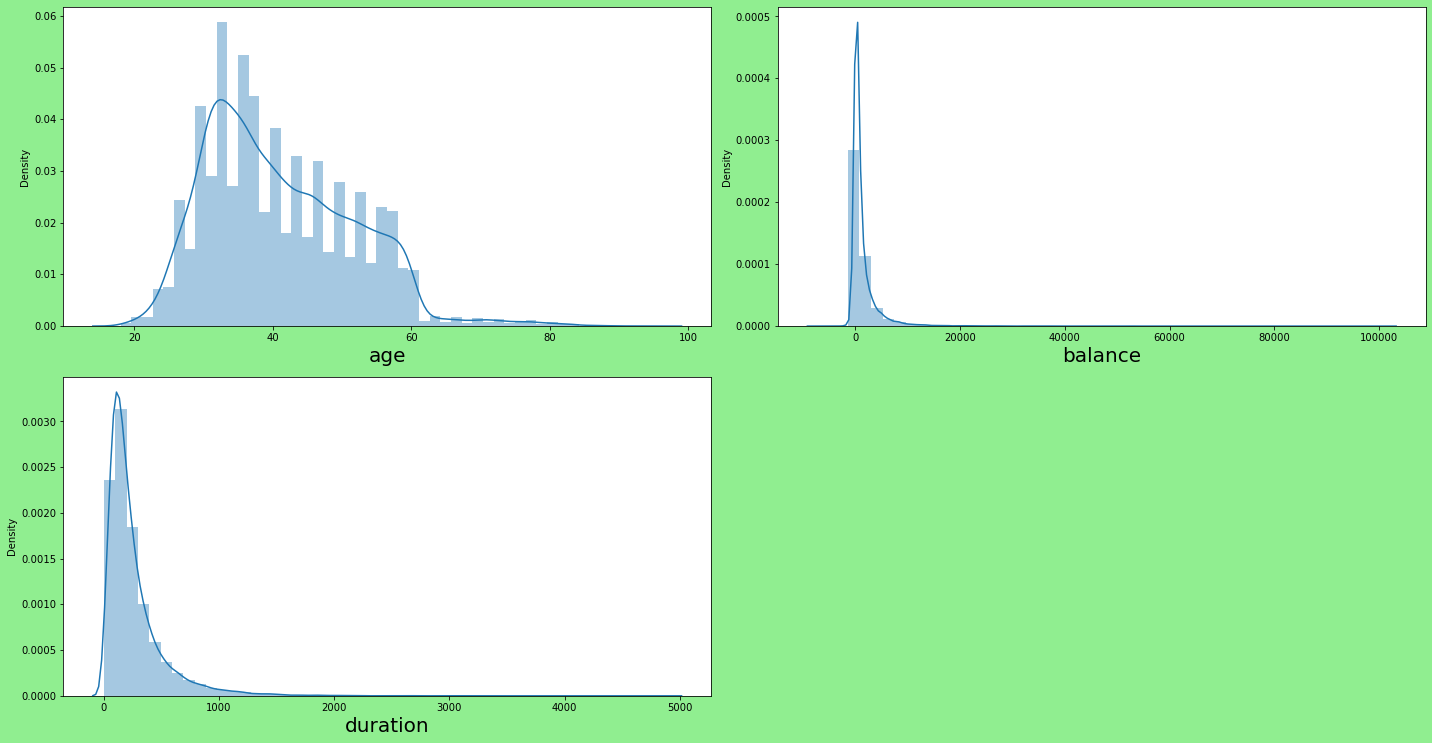

In [11]:
plt.figure(figsize=(20,15),facecolor='lightgreen')
plot_number=1

for column in continous_variiable:
    if plot_number<=3: 
        ax=plt.subplot(3,2,plot_number)
        sns.distplot(continous_variiable[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

Skewness is there in the above columns so first we need to remove of the skewness from these columns

In [12]:
print("Before Transformation Skewness:\n",continous_variiable.skew())

Before Transformation Skewness:
 age         0.681607
balance     7.995696
duration    3.199766
dtype: float64


### age , balance and duration are the only columns that are contnous in nature so we will try to remove skewness from them only using np.log method

In [13]:
continous_variiable['age']=np.log(continous_variiable['age'])
continous_variiable['balance']=np.log(continous_variiable['balance'])
continous_variiable['duration']=np.log(continous_variiable['duration'])

In [14]:
continous_variiable.skew()

age         0.100209
balance          NaN
duration         NaN
dtype: float64

#### Skewness got handled now Analysing the variables

### Univariate Analysis

In [15]:
#Analysis of 'Subscribed' variable
train['subscribed'].value_counts()


no     27932
yes     3715
Name: subscribed, dtype: int64

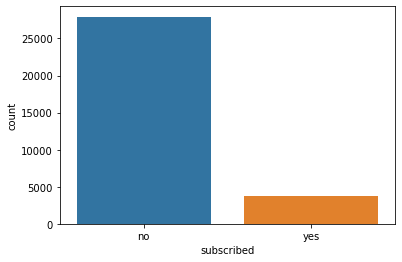

In [16]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')
plt.show()

In [17]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

From the above count we can clearly see that here subscribed is a imbalance data so we will fix this in later in this step so it won't craete any biaseness towards prediction 

### Analysing th 'Job' variable


In [18]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

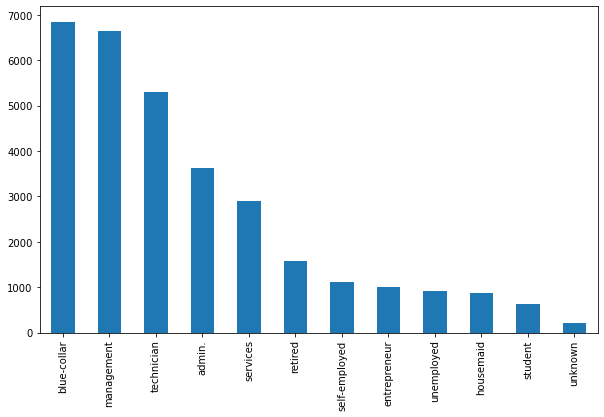

In [19]:
#visualising the above count plot
#sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

From the above plot we can clearly see that most of the clients belonged to blue-collar job and students are least in general as they don't make term deposits in general.



In [20]:
#analysing the 'marital' feature
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

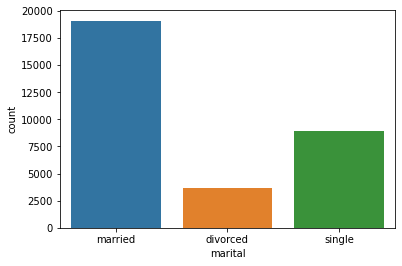

In [21]:
sns.countplot(data=train,x='marital')

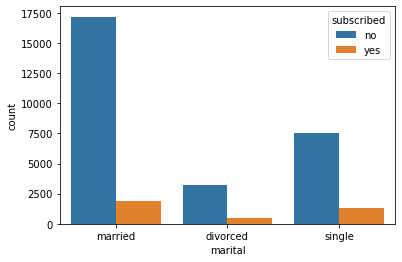

In [22]:
sns.countplot(data=train, x='marital', hue='subscribed');


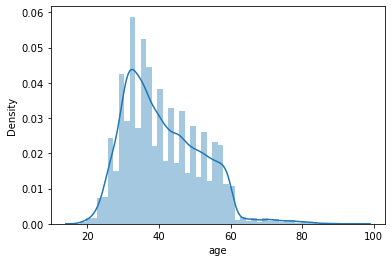

In [23]:
#analysing the 'age ' feature
sns.distplot(train['age']);


From the abouve distplot we can infer that age range in between 20-60

### Bivariate Analysis

In [24]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [25]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

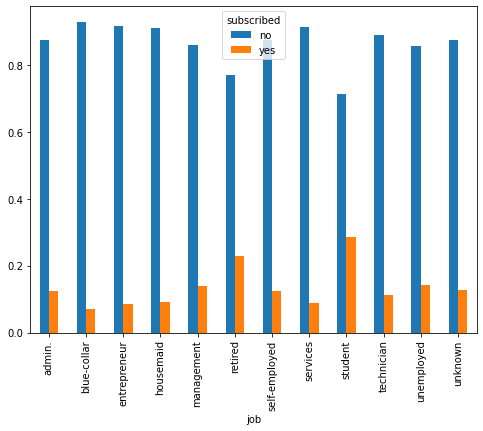

In [26]:
job_norm.plot.bar(figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [27]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [28]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm    

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


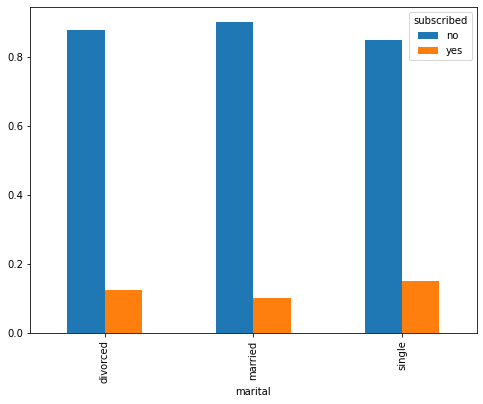

In [29]:
marital_norm.plot.bar(figsize=(8,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.



In [30]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [31]:
default=pd.crosstab(train['default'], train['subscribed'])
default_norm=default.div(default.sum(1).astype(float), axis=0)
default_norm    

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


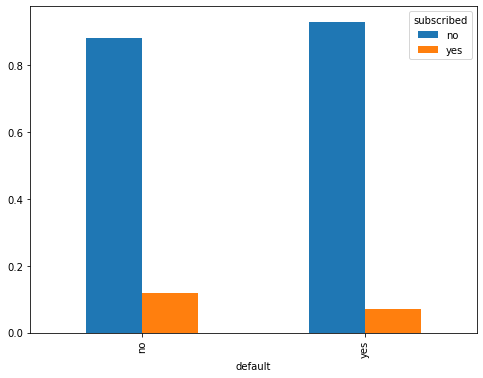

In [32]:
default_norm.plot.bar(figsize=(8,6));

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.



In [33]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [34]:
train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

Classes are imbalnce ,so we need to takecare of it later in project

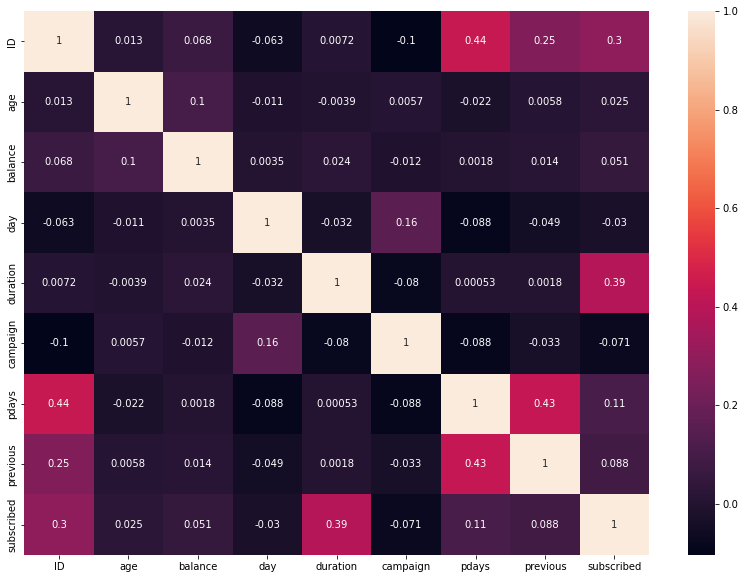

In [35]:
#plotting heatmap
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

### Model Building


In [36]:
#splitting features and label
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [37]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [38]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()


,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
target.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

Here we can clearly see that classes are imbalance in target variable so to avoid overfitting we gonna use resampling technique here

### Taking care of class imbalance

In [40]:
from imblearn.under_sampling import NearMiss

In [41]:
ds=NearMiss()

In [42]:
train,target=ds.fit_resample(train,target)

In [43]:
target.value_counts()

0    3715
1    3715
Name: subscribed, dtype: int64

In [44]:
target.value_counts(normalize=True)

0    0.5
1    0.5
Name: subscribed, dtype: float64

In [45]:
target.shape

(7430,)

In [46]:
# Splitting the dataset into test and training with 80% for training the model
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=12)


In [47]:


# Check whether the train and test have instances of all the glass types
print("Size of x_train :",X_train.shape)
print("Size of x_test :",X_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)


Size of x_train : (5944, 52)
Size of x_test : (1486, 52)
Size of x_train : (5944,)
Size of x_train : (1486,)


### Writing one function for different models accuracy


In [48]:
def metric_score(model, train,target):
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting for training
    pred_train = model.predict(X_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
     # Accuracy Score for training
    acc_score1 = (accuracy_score(y_train, pred_train))*100
    print("Accuracy Score for training:", acc_score1)
    
    # Accuracy Score for testing
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score for testing:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


### Logistic Regression


In [50]:
model=LogisticRegression()
metric_score(model, train, target)

Accuracy Score for training: 72.10632570659489
Accuracy Score for testing: 70.59219380888291

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.72       745
           1       0.72      0.67      0.70       741

    accuracy                           0.71      1486
   macro avg       0.71      0.71      0.71      1486
weighted avg       0.71      0.71      0.71      1486



### DecisionTreeClassifier

In [51]:
model=DecisionTreeClassifier()
metric_score(model, train, target)

Accuracy Score for training: 100.0
Accuracy Score for testing: 70.72678331090175

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       745
           1       0.71      0.71      0.71       741

    accuracy                           0.71      1486
   macro avg       0.71      0.71      0.71      1486
weighted avg       0.71      0.71      0.71      1486



### Random Forest

In [52]:
model=RandomForestClassifier()
metric_score(model, train, target)

Accuracy Score for training: 100.0
Accuracy Score for testing: 77.65814266487214

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       745
           1       0.78      0.76      0.77       741

    accuracy                           0.78      1486
   macro avg       0.78      0.78      0.78      1486
weighted avg       0.78      0.78      0.78      1486



### SVC

In [53]:
model=SVC()
metric_score(model, train, target)

Accuracy Score for training: 66.85733512786003
Accuracy Score for testing: 66.15074024226111

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71       745
           1       0.74      0.49      0.59       741

    accuracy                           0.66      1486
   macro avg       0.68      0.66      0.65      1486
weighted avg       0.68      0.66      0.65      1486



### XGBClassifier

In [54]:
import xgboost as xgb

In [55]:
xgb=xgb.XGBClassifier()

xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [56]:
metric_score(model, train, target)

Accuracy Score for training: 66.85733512786003
Accuracy Score for testing: 66.15074024226111

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71       745
           1       0.74      0.49      0.59       741

    accuracy                           0.66      1486
   macro avg       0.68      0.66      0.65      1486
weighted avg       0.68      0.66      0.65      1486



###  KNeighborsClassifier


In [57]:
model=KNeighborsClassifier()
metric_score(model, train, target)

Accuracy Score for training: 80.5013458950202
Accuracy Score for testing: 69.44818304172274

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       745
           1       0.71      0.65      0.68       741

    accuracy                           0.69      1486
   macro avg       0.70      0.69      0.69      1486
weighted avg       0.70      0.69      0.69      1486



### Checking Crossvalidation Score

In [58]:
lr=LogisticRegression()
svc=SVC()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()

In [59]:
models=[lr,dt,rfc,svc,knn]
for m in models:
    cvscore=cross_val_score(m,train,target,cv=10)
    print(f'Metrics of model {m}')
    print(cvscore)
    print(f'Mean cv score: ',cvscore.mean())
    print(cvscore.std())
    print('\n')

Metrics of model LogisticRegression()
[0.83041723 0.79138627 0.76716016 0.73216689 0.70121131 0.68909825
 0.67967699 0.67025572 0.66756393 0.61641992]
Mean cv score:  0.714535666218035
0.06184515762046762


Metrics of model DecisionTreeClassifier()
[0.63257066 0.66756393 0.74293405 0.70524899 0.72005384 0.72812921
 0.70524899 0.72678331 0.70928668 0.71197847]
Mean cv score:  0.7049798115746971
0.0306426927668989


Metrics of model RandomForestClassifier()
[0.73755047 0.78734859 0.76716016 0.79273217 0.76177658 0.76716016
 0.76985195 0.77388964 0.75235532 0.7577389 ]
Mean cv score:  0.7667563930013459
0.015251431525706191


Metrics of model SVC()
[0.74158816 0.69717362 0.69448183 0.68909825 0.64333782 0.6218035
 0.65814266 0.62584118 0.60969044 0.60699865]
Mean cv score:  0.6588156123822342
0.042786974316200155


Metrics of model KNeighborsClassifier()
[0.50336474 0.6756393  0.69717362 0.70659489 0.70121131 0.74024226
 0.71870794 0.72543742 0.69717362 0.70121131]
Mean cv score:  0.68667

### Plotting roc_auc_curve to find the best model 


In [60]:
lr.fit(X_train,y_train)
svc.fit(X_train,y_train)
dt.fit(X_train,y_train)
rfc.fit(X_train,y_train)
knn.fit(X_train,y_train)
print("training done")

training done


In [61]:
lr.score(X_test,y_test)
svc.score(X_test,y_test)
rfc.score(X_test,y_test)
dt.score(X_test,y_test)
knn.score(X_test,y_test)
print("All model's  Testing score captured")

All model's  Testing score captured


In [62]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

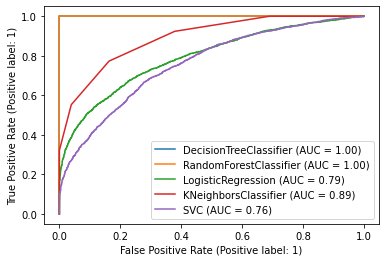

In [63]:
#plotting curves on training data
disp=plot_roc_curve(dt,X_train,y_train)
plot_roc_curve(rfc,X_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

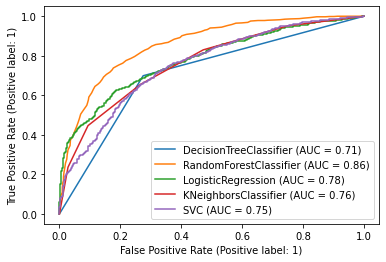

In [64]:
#plotting curve on test data
disp=plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':10},loc='lower right')
plt.show()

Decision tree and Random forest are giving 100% for training data. There may be chance of overfitting. So third highest is Logistic regression and it's same for both training and test data also in almost same score in roc_auc plot So choosing Logistic REgression model as my final model

### Hyperparameter Tuning on LogisticRegression

In [65]:
param={'penalty':['l1', 'l2', 'elasticnet'],'C':[0.1,0.001],'max_iter':[100,50]}

In [66]:
grid=GridSearchCV(lr,param_grid=param,scoring='accuracy')
grid.fit(X_train,y_train)

print("best params",grid.best_params_)

best params {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}


In [67]:
lr=grid.best_estimator_ #will cover all best parameters,as equal as tuning the paramters
lr.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [68]:
metric_score(lr, train, target)

Accuracy Score for training: 72.05585464333782
Accuracy Score for testing: 70.65948855989232

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       745
           1       0.72      0.68      0.70       741

    accuracy                           0.71      1486
   macro avg       0.71      0.71      0.71      1486
weighted avg       0.71      0.71      0.71      1486



#### Accuracy before tuning the parameter: 70.59219380888291
#### Accuracy after tuning the parameter   : 70.65948855989232

### Saving the model in LogisticRegression


In [69]:
import pickle

In [70]:
filename='bank marketing.pkl'

In [71]:
pickle.dump(lr,open(filename,'wb'))

### Loading test data

In [72]:
#test data
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [73]:
#Checking for null values
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [74]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [75]:
print("Number of rows and columns in Test Data:",test.shape)

Number of rows and columns in Test Data: (13564, 17)


In [76]:
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [77]:
continous=test[['age','balance','duration']]
continous

,age,balance,duration
0,32,118,20
1,78,2787,372
2,31,144,676
3,57,3777,65
4,45,-705,111
...,...,...,...
13559,39,45,148
13560,54,2281,158
13561,35,285,136
13562,29,464,208


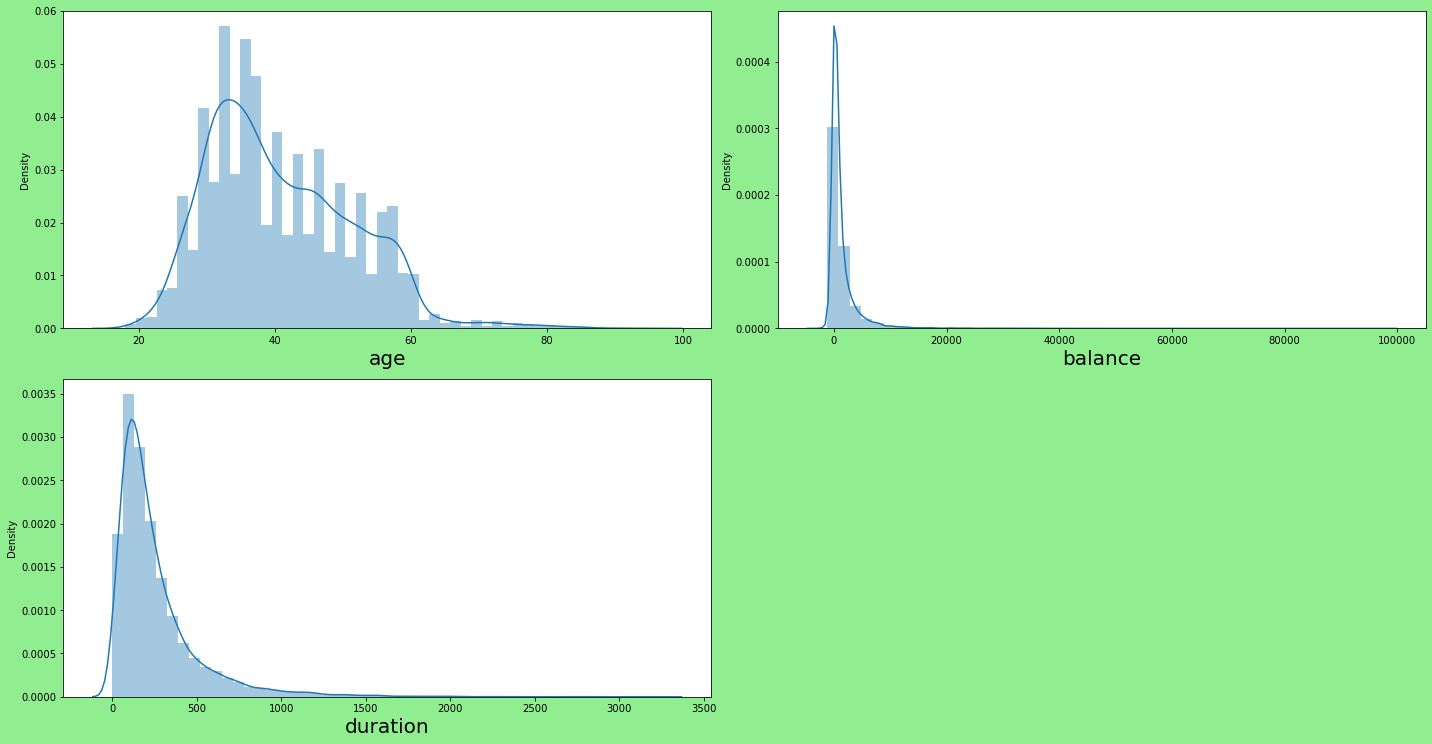

In [79]:
plt.figure(figsize=(20,15),facecolor='lightgreen')
plot_number=1

for column in continous:
    if plot_number<=3: 
        ax=plt.subplot(3,2,plot_number)
        sns.distplot(continous[column]) 
        plt.xlabel(column,fontsize=20)
     
    plot_number +=1
    
    
plt.tight_layout()

### Checking for skewness and removal

In [80]:
print("Before Transformation Skewness:\n",continous.skew())

Before Transformation Skewness:
 age         0.692404
balance     9.165015
duration    3.017221
dtype: float64


In [81]:
continous['age']=np.log(continous['age'])
continous['balance']=np.log(continous['balance'])
continous['duration']=np.log(continous['duration'])

In [82]:
print("Afetr Transformation Skewness:\n",continous.skew())

Afetr Transformation Skewness:
 age         0.09585
balance         NaN
duration        NaN
dtype: float64


 ### Let's now make the prediction on test dataset



In [83]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### loading the saved model and  predict

In [84]:
loaded_model=pickle.load(open(filename, 'rb'))
test_predict=loaded_model.predict(test) 
test_predict

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

### Another method for predicting on test dataset 

In [85]:
test_pred = lr.predict(test)
test_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

### Finally, we will save these predictions into a csv file.



In [86]:
submissions = pd.DataFrame()

In [87]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_predict


In [88]:
submissions['subscribed']

0        0
1        1
2        1
3        1
4        0
        ..
13559    0
13560    0
13561    0
13562    0
13563    1
Name: subscribed, Length: 13564, dtype: int64

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.



In [89]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [90]:
submissions['subscribed']


0         no
1        yes
2        yes
3        yes
4         no
        ... 
13559     no
13560     no
13561     no
13562     no
13563    yes
Name: subscribed, Length: 13564, dtype: object

In [91]:
submissions.to_csv('submission file.csv', header=True, index=False)


In [92]:
submissions

,ID,subscribed
0,38441,no
1,40403,yes
2,3709,yes
3,37422,yes
4,12527,no
...,...,...
13559,23465,no
13560,11743,no
13561,28292,no
13562,45163,no
